# MAGIC Gamma Telescope

The MAGIC Gamma Telescope dataset is designed to simulate the registration of high-energy gamma particles using an atmospheric Cherenkov telescope. The dataset is generated through Monte Carlo simulations to capture the Cherenkov radiation emitted by charged particles during electromagnetic showers initiated by gamma rays in the atmosphere.

## Dataset Details:
* Number of Instances: 19,020
* Number of Features: 10 continuous features plus 1 categorical label
* Features: Attributes such as the major axis length (fLength), minor axis width (fWidth), total pixel content (fSize), concentration ratios (fConc, fConc1), asymmetry (fAsym), moments (fM3Long, fM3Trans), angle (fAlpha), and distance (fDist).
* Class Labels: The target variable is binary, with 'g' for gamma (signal) and 'h' for hadron (background). The dataset has an imbalance with more gamma instances than hadron instances.

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

## Objective:
The primary task is classification. The goal is to distinguish between events caused by primary gamma rays (signal) and hadronic showers (background). This is crucial for experiments aimed at observing cosmic gamma rays, as correctly identifying gamma events helps in studying astrophysical phenomena.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [2]:
df = pd.read_csv("/kaggle/input/magic-gamma-cherenkov-telescope-dataset/magic04.data")
df.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [3]:
cols = ["fLength","fWidth","fsize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

df = pd.read_csv("/kaggle/input/magic-gamma-cherenkov-telescope-dataset/magic04.data", names = cols)
df.head()

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"] = (df["class"]=="g").astype(int)

In [5]:
df.head()

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


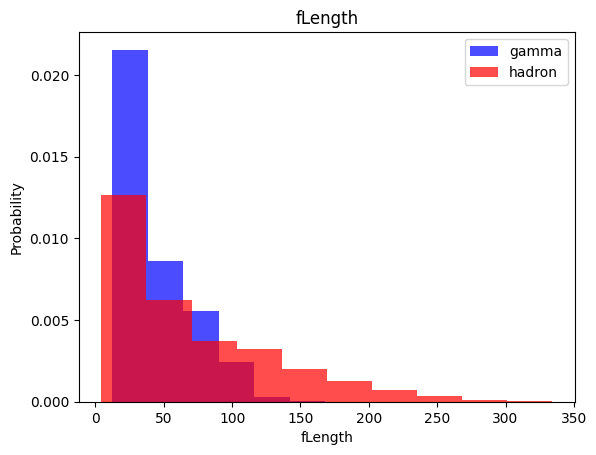

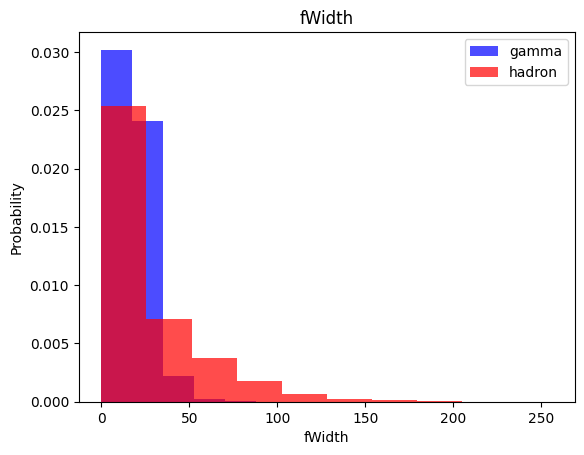

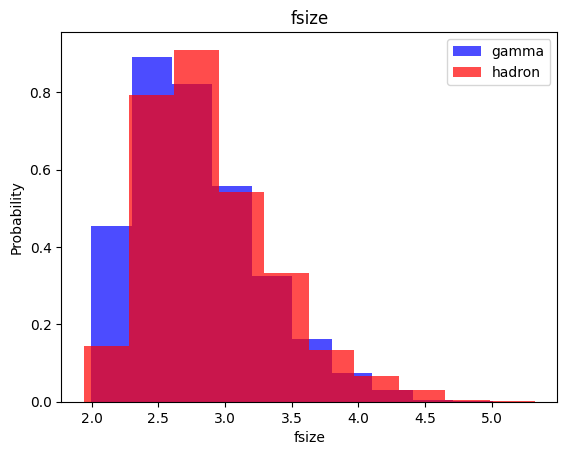

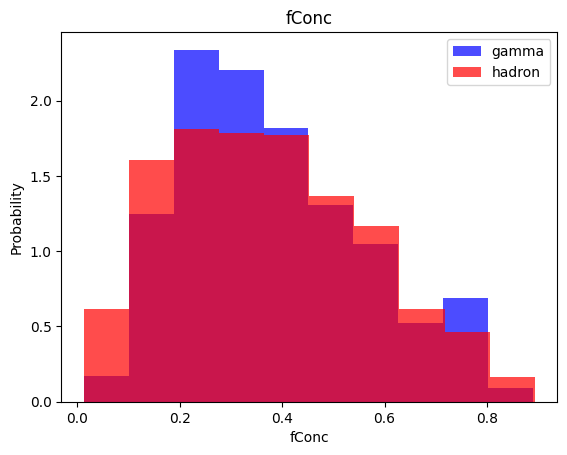

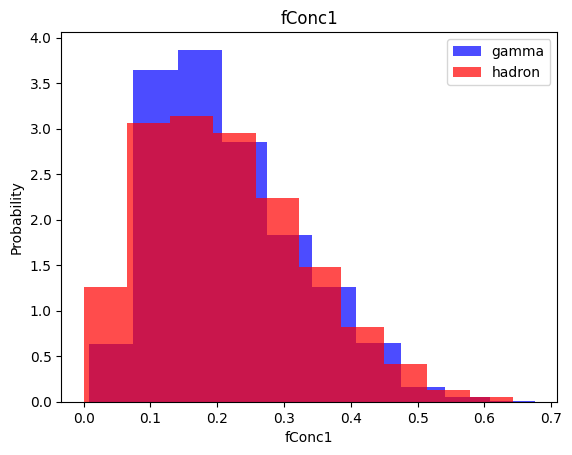

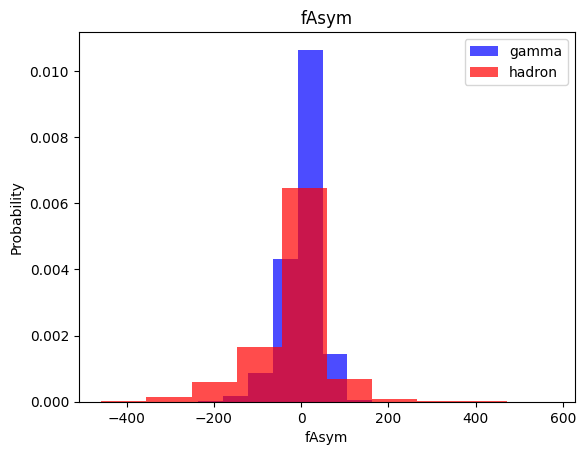

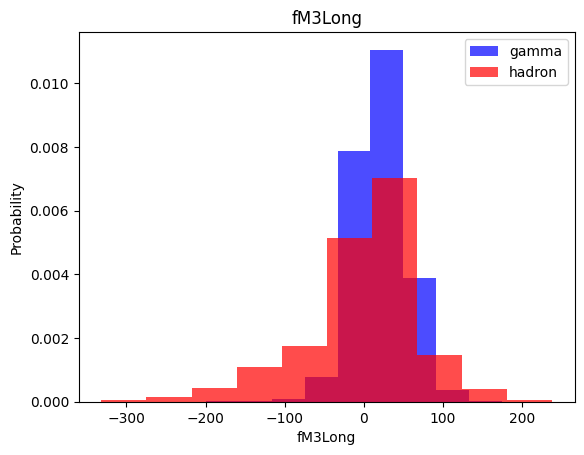

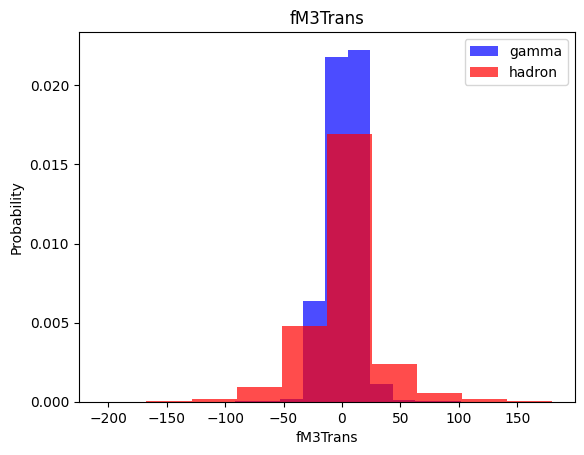

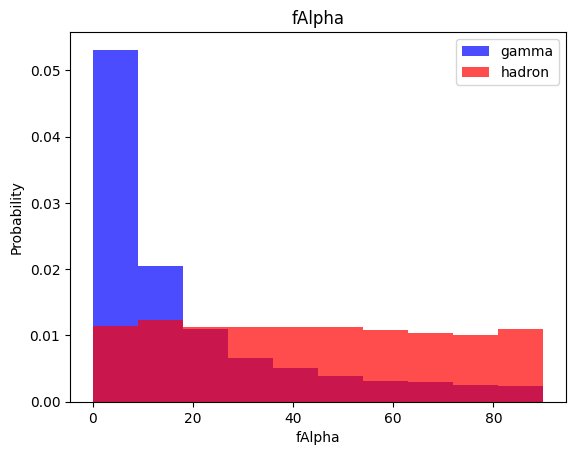

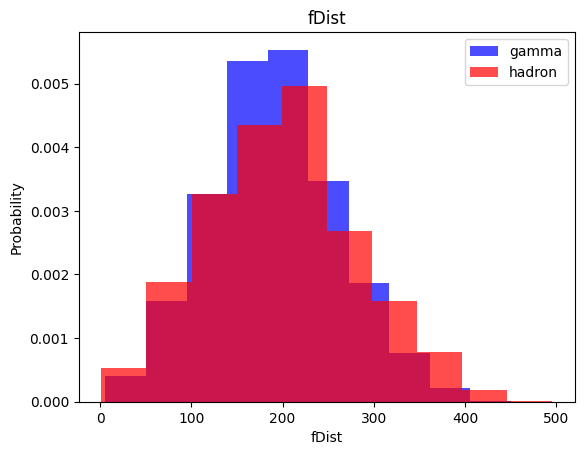

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color = 'blue', label = 'gamma',alpha = 0.7, density = True )
    plt.hist(df[df["class"]==0][label], color = 'red', label = 'hadron',alpha = 0.7, density = True )
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Data Split: Train, Validation and Test Dataset


* Shuffling the DataFrame using sample(frac=1).
* Splitting the shuffled DataFrame into three parts:
    * train gets 60% of the data.
    * valid gets the next 20% of the data.
    * test gets the remaining 20% of the data.

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


print("Gamma Samples: ", len(train[train["class"]==1])) #gamma
print("Hadron Samples: ",len(train[train["class"]==0])) #hadron

Gamma Samples:  7355
Hadron Samples:  4057


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
"""
This function is designed to preprocess your dataset by scaling the features to have 
a mean of 0 and a standard deviation of 1. If you have an imbalanced dataset and set 
oversample=True, it will also oversample the data to balance the class distribution. 
Finally, it combines the features and labels back into a single dataset and returns 
the processed data, the scaled features, and the labels.
"""

def scale_dataset(dataframe, oversample=False):
    # Step 1: Extract features and labels from the DataFrame
    X = dataframe[dataframe.columns[:-1]].values  # Extract all columns except the last one as features
    y = dataframe[dataframe.columns[-1]].values   # Extract the last column as labels
    
    # Step 2: Scale the features
    scaler = StandardScaler()  # Create a StandardScaler object
    X = scaler.fit_transform(X)  # Fit the scaler to the features and transform them
    
    # Step 3: Optionally oversample the data
    if oversample:
        ros = RandomOverSampler()  # Create a RandomOverSampler object
        X, y = ros.fit_resample(X, y)  # Resample the features and labels to balance class distribution
    
    # Step 4: Combine the features and labels back into a single dataset
    data = np.hstack((X, np.reshape(y, (-1, 1))))  # Horizontally stack the features and reshaped labels
    
    # Step 5: Return the processed dataset, scaled features, and labels
    return data, X, y


* StandardScaler(): Creates a scaler object that standardizes the features by removing the mean and scaling to unit variance.
 
* fit_transform(X): Fits the scaler to the features X and then transforms the features to have a mean of 0 and a standard deviation of 1.

* RandomOverSampler(): Creates an oversampler object to handle imbalanced datasets.train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [9]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [10]:
print("Total Samples: ", len(df))
print("Number of Samples in Training Dataset: ", len(train))
print("Number of Samples in Validation Dataset", len(valid))
print("Number of Samples in Test Dataset", len(test))

Total Samples:  19020
Number of Samples in Training Dataset:  14710
Number of Samples in Validation Dataset 3804
Number of Samples in Test Dataset 3804


# Machine Learning Algorithms

Now the data is preprocessed and we have extracted features, next step is to use machine learning algorithms, for this project we will cover:

* K-Nearest Neighbor (K-NN)
* Naive Bayes (NB)
* Logistic Regression (LR)
* Support Vector Machine (SVM)

## 1. K-Nearest Neighbor

* Used for both classification and regression tasks
* Core idea is to predict the value or class of a data point based on the 'k' closest data points in the feature space.
 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_model  = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [13]:
y_test

array([0, 0, 1, ..., 0, 1, 1])

# Classification Report

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1301
           1       0.85      0.89      0.87      2503

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



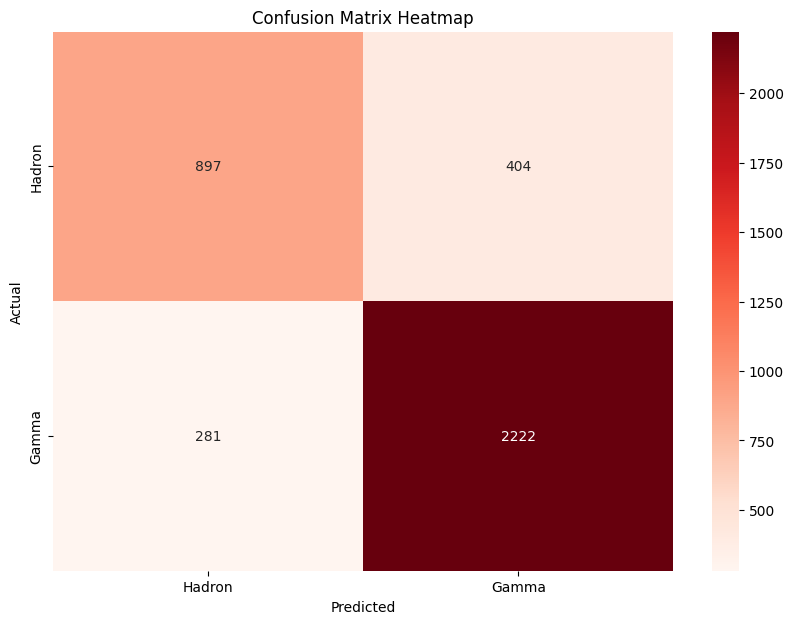

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Hadron', 'Gamma'], yticklabels=['Hadron', 'Gamma'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 2. Naive Bayes

* Supervised learning algorithm for classification
* Based on applying Bayes theorem


In [16]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.43      0.52      1301
           1       0.75      0.89      0.81      2503

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



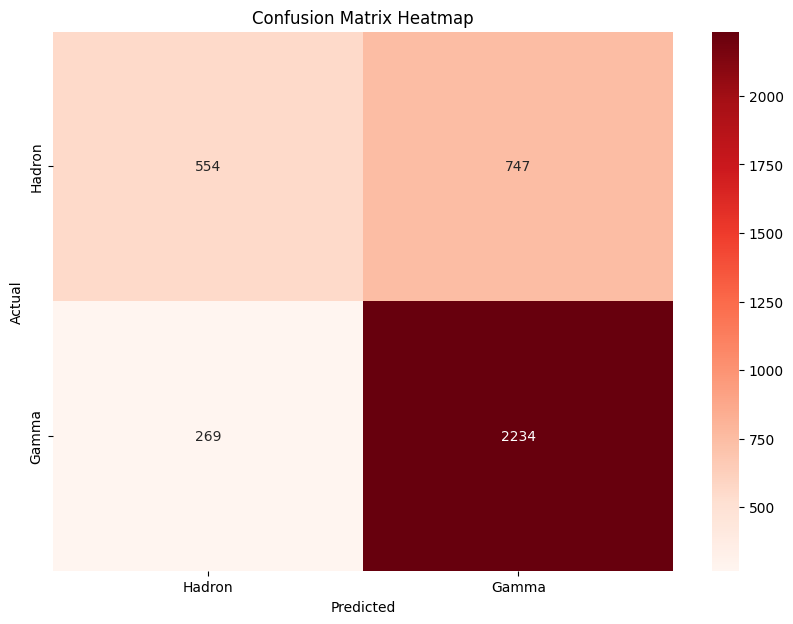

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Hadron', 'Gamma'], yticklabels=['Hadron', 'Gamma'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 3. Logistic Regression

* 


## 4. Support Vector Machine

* 


## 5. Neural Network for Machine Learning